In [1]:
from math import sqrt
import random
import copy
import os
import time

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from IPython import display

#environment
import gym
import pybullet
import pybulletgym.envs
import pybullet_envs


#pytorch
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

# device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

if torch.cuda.is_available():
    print('Using device:', torch.cuda.get_device_name(0))
else:
    print('Using device:', device)

Using device: GeForce GTX 1050


In [2]:
env_name =  'Walker2DBulletEnv-v0'
env = gym.make(env_name)

myddpg = torch.load("Td3_pybullet_walker.pt")

RANDOM_SEED = 0

torch.manual_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

/home/roumen/Documents/GitHub/gym/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Using device: GeForce GTX 1050


<function matplotlib.pyplot.gcf()>

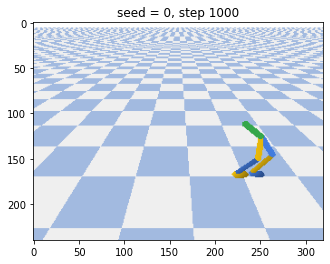

2.0927654340717017


In [3]:
state = env.reset()
env.seed(RANDOM_SEED)
env.action_space.seed(RANDOM_SEED)

total_reward = 0
step = 0
done = False

plt.figure()
t = 'seed = {}, step {}'.format(RANDOM_SEED, step)
plt.imshow(env.render(mode='rgb_array'))
display.clear_output(wait=True)
display.display(plt.gcf)
plt.title(t)
plt.savefig("frames/" + t.replace(':', ' - '), dpi=150)
plt.show()
while not done:
    # env.env._cam_dist=1
    # env.env._cam_pitch=-90
    action = myddpg.actor(torch.FloatTensor(state).to(device)).detach().cpu().squeeze().numpy()
    next_state, r, done, _ = env.step(action)
    state = next_state
    step += 1
    total_reward += r
    
    plt.figure()
    t = 'seed = {}, step {}'.format(RANDOM_SEED, step)
    plt.imshow(env.render(mode='rgb_array'))
    display.clear_output(wait=True)
    display.display(plt.gcf)
    plt.title(t)
    plt.savefig("frames/" + t.replace(':', ' - ') + ".png", dpi=150)
    plt.show()

print(total_reward / step)